# **PNEUMONIA DETECTION USING DEEP LEARNING**

## **1. Import Packages and Functions**

In [ ]:
# Import necessory modules
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from keras.applications import ResNet50
from keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
from google.colab import drive, files
warnings.filterwarnings('ignore')
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. Loading Dataset**

In [ ]:
# Load dataset
train = "/content/drive/MyDrive/chest_xray/train"
test = "/content/drive/MyDrive/chest_xray/test"
val = "/content/drive/MyDrive/chest_xray/val"

## **3. Image Preprocessing**

In [ ]:
# Preprocess data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(train,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_generator = test_datagen.flow_from_directory(test,
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
val_generator = val_datagen.flow_from_directory(val,
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 16 images belonging to 2 classes.


## **4. Data Visualization**

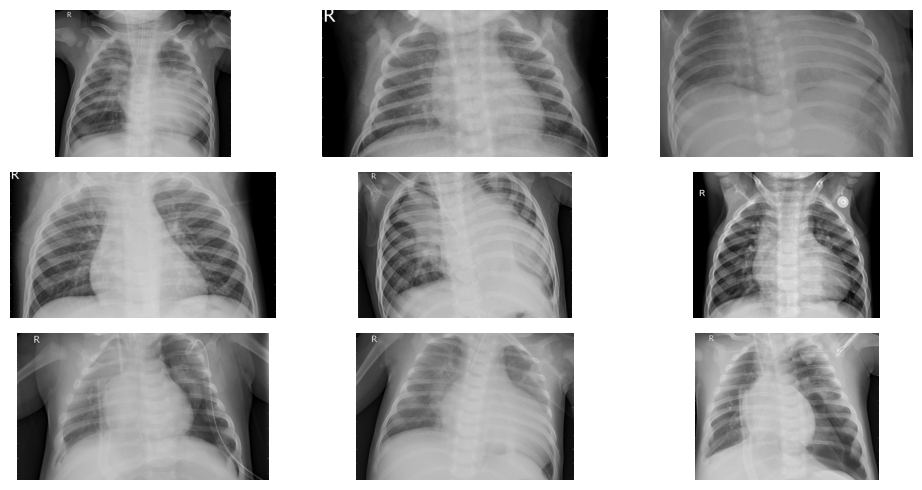

In [ ]:
# Visualisation of images of Pneumonia from dataset
pneumonia = os.listdir("/content/drive/MyDrive/chest_xray/train/PNEUMONIA")
pneumonia_dir = "/content/drive/MyDrive/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(10, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

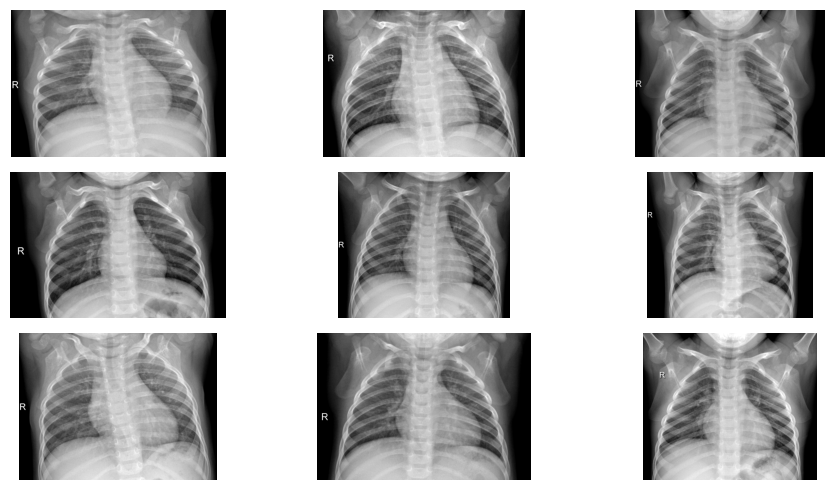

In [ ]:
# Visualisation of images of normal x-rays from the dataset
normal = os.listdir("/content/drive/MyDrive/chest_xray/train/NORMAL")
normal_dir = "/content/drive/MyDrive/chest_xray/train/NORMAL"

plt.figure(figsize=(10, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

## **5. Creating CNN model**

In [ ]:
# Create a CNN model
model = Sequential()
model.add(Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (3,3), activation= 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
history = model.fit(train_generator, epochs = 50, validation_data = val_generator)

Epoch 1/50
41/41 [==============================] - 834s 20s/step - loss: 0.5298 - accuracy: 0.7500 - val_loss: 2.7175 - val_accuracy: 0.6250
Epoch 2/50
41/41 [==============================] - 170s 4s/step - loss: 0.4219 - accuracy: 0.8043 - val_loss: 2.9135 - val_accuracy: 0.6250
Epoch 3/50
41/41 [==============================] - 168s 4s/step - loss: 0.3259 - accuracy: 0.8574 - val_loss: 1.5846 - val_accuracy: 0.6250
Epoch 4/50
41/41 [==============================] - 172s 4s/step - loss: 0.2732 - accuracy: 0.8848 - val_loss: 1.4377 - val_accuracy: 0.6250
Epoch 5/50
41/41 [==============================] - 168s 4s/step - loss: 0.2802 - accuracy: 0.8819 - val_loss: 1.3942 - val_accuracy: 0.6250
Epoch 6/50
41/41 [==============================] - 165s 4s/step - loss: 0.2509 - accuracy: 0.8942 - val_loss: 0.8072 - val_accuracy: 0.6875
Epoch 7/50
41/41 [==============================] - 166s 4s/step - loss: 0.2445 - accuracy: 0.8955 - val_loss: 1.0313 - val_accuracy: 0.6250
Epoch 8/50
4

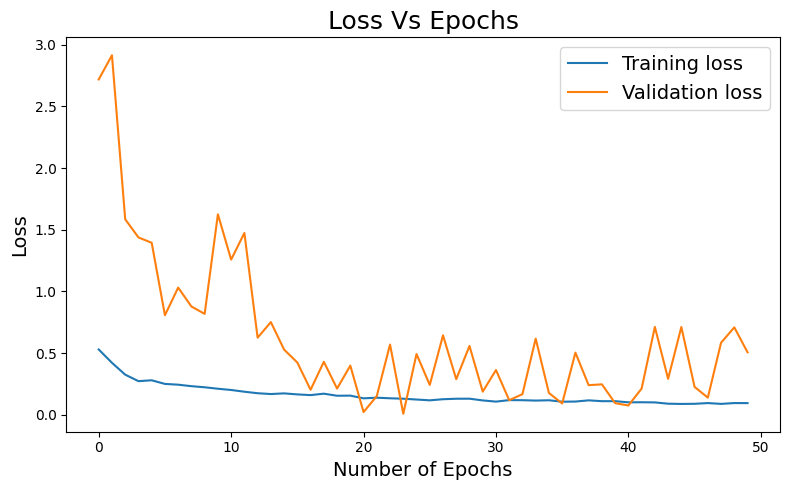

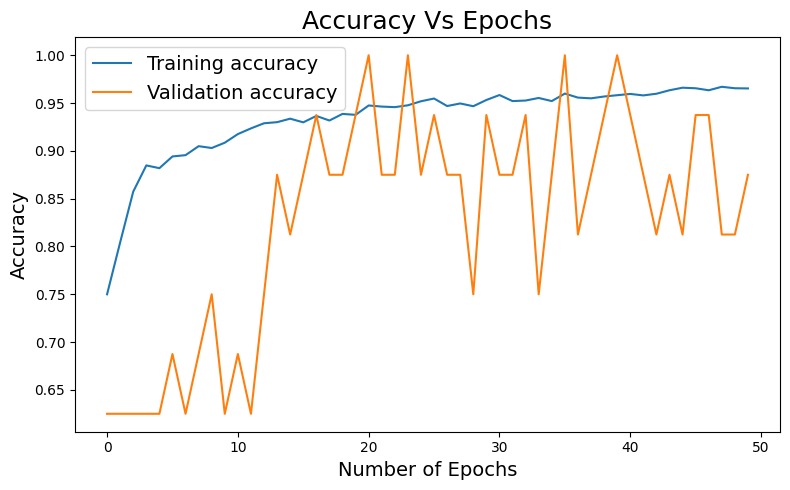

In [ ]:
# Plotting training and validation losses
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Number of Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Loss Vs Epochs", fontsize=18)
plt.legend(['Training loss','Validation loss'], fontsize=14)
plt.tight_layout()
plt.show()

# Plotting training and validation accuracies
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Number of Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluation
test_evaluation = model.evaluate(test_generator)
print(f"Test Loss: {test_evaluation[0]:.4f}")
print(f"Test Accuracy: {test_evaluation[1] * 100:.2f}%")

train_evaluation = model.evaluate(train_generator)
print(f"Train Loss: {train_evaluation[0]:.4f}")
print(f"Train Accuracy: {train_evaluation[1] * 100:.2f}%")

5/5 [==============================] - 133s 32s/step - loss: 0.6777 - accuracy: 0.8141
Test Loss: 0.6777
Test Accuracy: 81.41%
41/41 [==============================] - 164s 4s/step - loss: 0.0775 - accuracy: 0.9689
Train Loss: 0.0775
Train Accuracy: 96.89%


5/5 [==============================] - 20s 4s/step
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.35      0.20      0.25       234
   PNEUMONIA       0.62      0.78      0.69       390

    accuracy                           0.56       624
   macro avg       0.48      0.49      0.47       624
weighted avg       0.52      0.56      0.53       624



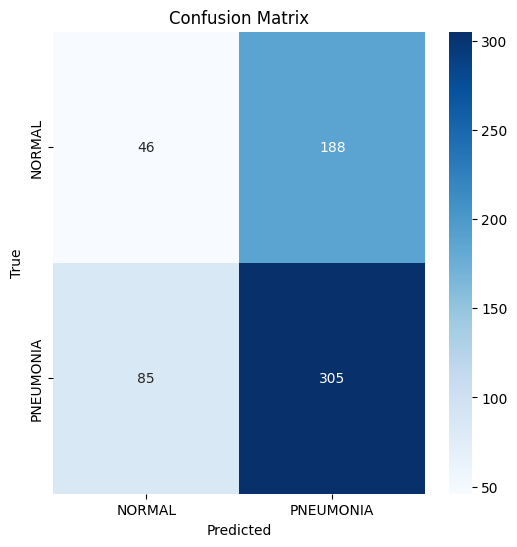

In [ ]:
# Generate predictions on the test data
predictions = model.predict(test_generator)
binary_predictions = (predictions > 0.5).astype(int)

# Get true labels from the test generator
true_labels = test_generator.labels
# Generate classification report
report = classification_report(true_labels, binary_predictions,
                               target_names=['NORMAL', 'PNEUMONIA'])
print("Classification Report:\n", report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NORMAL', 'PNEUMONIA'],
            yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## **6. Creating ResNet-50 Model**

In [ ]:
# Create a ResNet50 model
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze the layers of the pre-trained model
for layer in resnet_base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = GlobalAveragePooling2D()(resnet_base_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)
resnet_model = Model(inputs=resnet_base_model.input, outputs=output_layer)


resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 306, 306, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
history = resnet_model.fit(train_generator, epochs = 50, validation_data = val_generator)

Epoch 1/50
41/41 [==============================] - 275s 7s/step - loss: 0.6216 - accuracy: 0.7218 - val_loss: 0.8472 - val_accuracy: 0.5000
Epoch 2/50
41/41 [==============================] - 209s 5s/step - loss: 0.5655 - accuracy: 0.7429 - val_loss: 0.8741 - val_accuracy: 0.5000
Epoch 3/50
41/41 [==============================] - 208s 5s/step - loss: 0.5509 - accuracy: 0.7452 - val_loss: 1.0003 - val_accuracy: 0.5000
Epoch 4/50
41/41 [==============================] - 206s 5s/step - loss: 0.5194 - accuracy: 0.7477 - val_loss: 0.7955 - val_accuracy: 0.5000
Epoch 5/50
41/41 [==============================] - 207s 5s/step - loss: 0.4599 - accuracy: 0.7669 - val_loss: 1.4856 - val_accuracy: 0.5000
Epoch 6/50
41/41 [==============================] - 207s 5s/step - loss: 0.4356 - accuracy: 0.7895 - val_loss: 0.9491 - val_accuracy: 0.5625
Epoch 7/50
41/41 [==============================] - 209s 5s/step - loss: 0.3971 - accuracy: 0.8112 - val_loss: 1.1941 - val_accuracy: 0.6250
Epoch 8/50
41

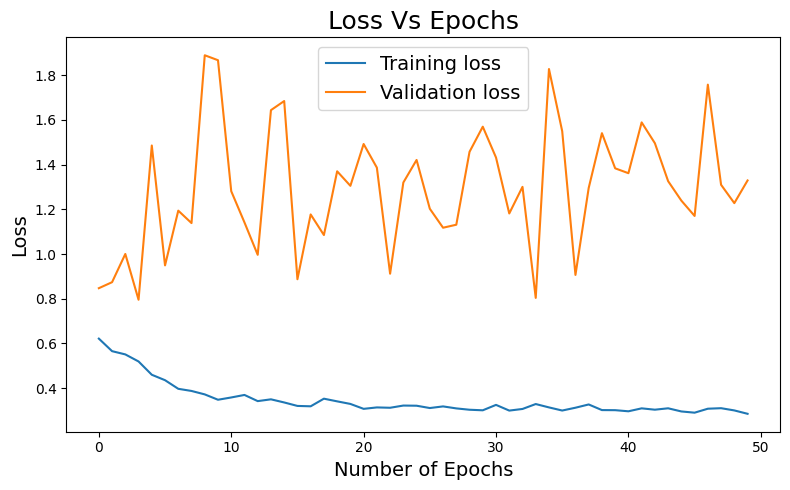

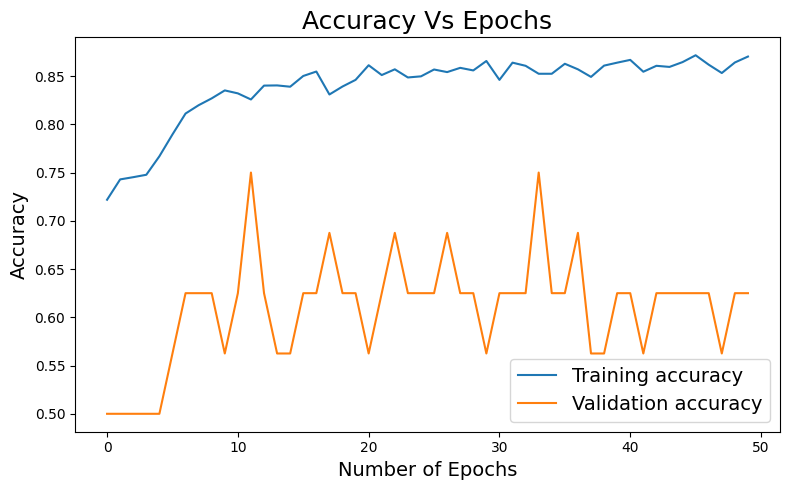

In [ ]:
# Plotting training and validation losses
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Number of Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Loss Vs Epochs", fontsize=18)
plt.legend(['Training loss','Validation loss'], fontsize=14)
plt.tight_layout()
plt.show()

# Plotting training and validation accuracies
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Number of Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluation
test_evaluation = resnet_model.evaluate(test_generator)
print(f"Test Loss: {test_evaluation[0]:.4f}")
print(f"Test Accuracy: {test_evaluation[1] * 100:.2f}%")

train_evaluation = resnet_model.evaluate(train_generator)
print(f"Train Loss: {train_evaluation[0]:.4f}")
print(f"Train Accuracy: {train_evaluation[1] * 100:.2f}%")

5/5 [==============================] - 126s 30s/step - loss: 0.5265 - accuracy: 0.7981
Test Loss: 0.5265
Test Accuracy: 79.81%
41/41 [==============================] - 211s 5s/step - loss: 0.2756 - accuracy: 0.8746
Train Loss: 0.2756
Train Accuracy: 87.46%


5/5 [==============================] - 26s 5s/step
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.35      0.25      0.29       234
   PNEUMONIA       0.62      0.72      0.66       390

    accuracy                           0.54       624
   macro avg       0.48      0.49      0.48       624
weighted avg       0.52      0.54      0.52       624



Text(0.5, 1.0, 'Confusion Matrix')

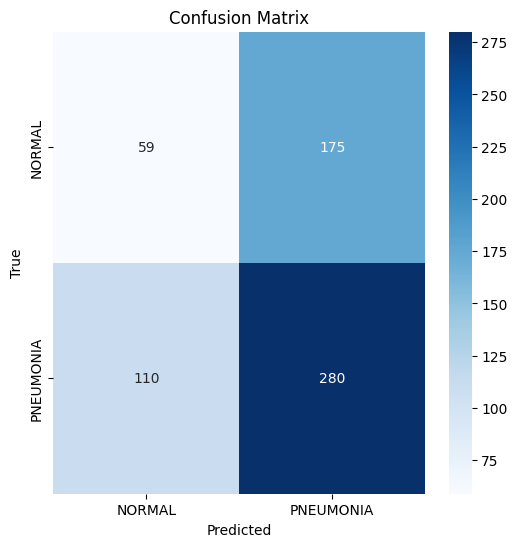

In [ ]:
# Generate predictions on the test data
predictions = resnet_model.predict(test_generator)
binary_predictions = (predictions > 0.5).astype(int)

# Get true labels from the test generator
true_labels = test_generator.labels
# Generate classification report
report = classification_report(true_labels, binary_predictions,
                               target_names=['NORMAL', 'PNEUMONIA'])
print("Classification Report:\n", report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NORMAL', 'PNEUMONIA'],
            yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

## **7. Creating DenseNet-121 Model**

In [ ]:
# Create a DenseNet121 model
densenet_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze the layers in the base model
for layer in densenet_base_model.layers:
    layer.trainable = False

# Add your custom classifier on top
x = densenet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
densenet_model = Model(inputs=densenet_base_model.input, outputs=output)
densenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

densenet_model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 306, 306, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 150, 150, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                             

In [ ]:
history = densenet_model.fit(train_generator, epochs = 50, validation_data = val_generator)

Epoch 1/50
41/41 [==============================] - 549s 13s/step - loss: 0.3120 - accuracy: 0.8654 - val_loss: 1.2176 - val_accuracy: 0.6250
Epoch 2/50
41/41 [==============================] - 178s 4s/step - loss: 0.1790 - accuracy: 0.9310 - val_loss: 0.4688 - val_accuracy: 0.8125
Epoch 3/50
41/41 [==============================] - 176s 4s/step - loss: 0.1647 - accuracy: 0.9363 - val_loss: 1.1011 - val_accuracy: 0.6250
Epoch 4/50
41/41 [==============================] - 177s 4s/step - loss: 0.1501 - accuracy: 0.9413 - val_loss: 0.4343 - val_accuracy: 0.8125
Epoch 5/50
41/41 [==============================] - 176s 4s/step - loss: 0.1423 - accuracy: 0.9457 - val_loss: 0.4408 - val_accuracy: 0.8125
Epoch 6/50
41/41 [==============================] - 177s 4s/step - loss: 0.1470 - accuracy: 0.9440 - val_loss: 0.2745 - val_accuracy: 0.8750
Epoch 7/50
41/41 [==============================] - 177s 4s/step - loss: 0.1313 - accuracy: 0.9507 - val_loss: 0.4395 - val_accuracy: 0.8750
Epoch 8/50
4

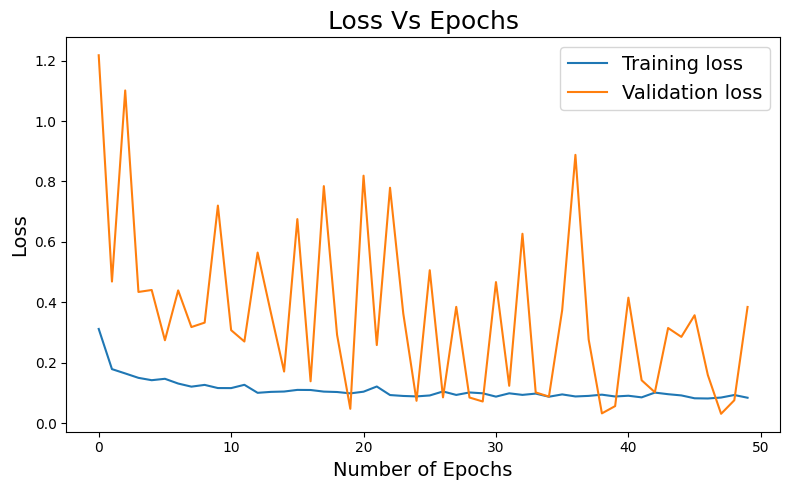

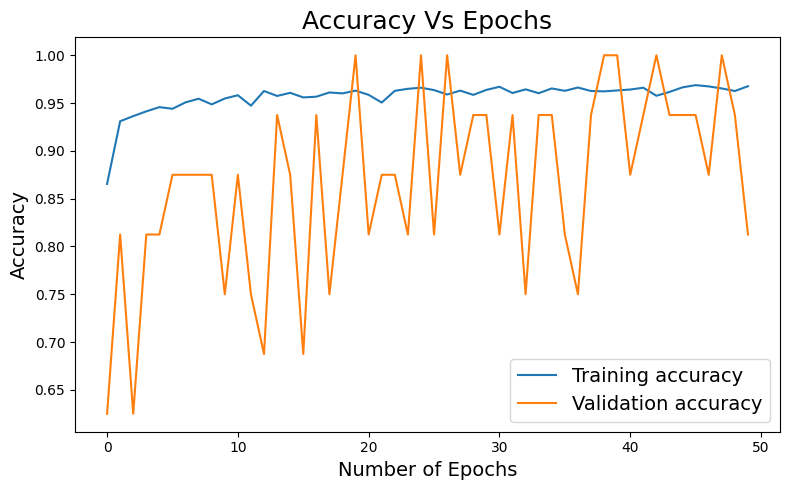

In [ ]:
# Plotting training and validation losses
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Number of Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Loss Vs Epochs", fontsize=18)
plt.legend(['Training loss','Validation loss'], fontsize=14)
plt.tight_layout()
plt.show()

# Plotting training and validation accuracies
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Number of Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluation
test_evaluation = densenet_model.evaluate(test_generator)
print(f"Test Loss: {test_evaluation[0]:.4f}")
print(f"Test Accuracy: {test_evaluation[1] * 100:.2f}%")

train_evaluation = densenet_model.evaluate(train_generator)
print(f"Train Loss: {train_evaluation[0]:.4f}")
print(f"Train Accuracy: {train_evaluation[1] * 100:.2f}%")

5/5 [==============================] - 141s 34s/step - loss: 0.8703 - accuracy: 0.7740
Test Loss: 0.8703
Test Accuracy: 77.40%
41/41 [==============================] - 197s 5s/step - loss: 0.0909 - accuracy: 0.9647
Train Loss: 0.0909
Train Accuracy: 96.47%


5/5 [==============================] - 25s 5s/step
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.37      0.18      0.24       234
   PNEUMONIA       0.62      0.82      0.71       390

    accuracy                           0.58       624
   macro avg       0.50      0.50      0.48       624
weighted avg       0.53      0.58      0.53       624



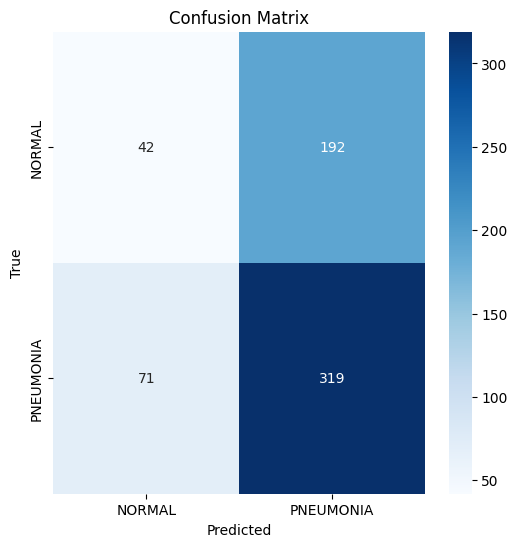

In [ ]:
# Generate predictions on the test data
predictions = densenet_model.predict(test_generator)
binary_predictions = (predictions > 0.5).astype(int)

# Get true labels from the test generator
true_labels = test_generator.labels
# Generate classification report
report = classification_report(true_labels, binary_predictions,
                               target_names=['NORMAL', 'PNEUMONIA'])
print("Classification Report:\n", report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(true_labels, binary_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NORMAL', 'PNEUMONIA'],
            yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()